<b> <font face='verdana' size='6' color='navy'> Deep Learning Project (Computer Vision)</font>
<b> <p align='justify'> <font size='5'> Project Objective: To build an	Image Classifier to recognize images </p>
<b> <p align='justify'> <font size='5'> Solution:	Develop an Image Classification Model using Convolutional Neural Network </p>
### __Author__:	 Anne WL Wong  __&emsp;Date__:	 January 30, 2021</p>

<b> <font face='verdana' size='5' color='navy'>1. INTRODUCTION</font>
    <b> <p align='justify'> <font size='4'> *The aim of this project is to utilize the CIFAR-10 dataset to create an image classifier using Convolutional Neural Networks to classify images into 10 classes: 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship' and 'truck'. The dataset consists of 60,000 32x32 colour images in these 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images. Below are the 10 classes in the dataset, as well as 10 random images from each class.*</p>       
        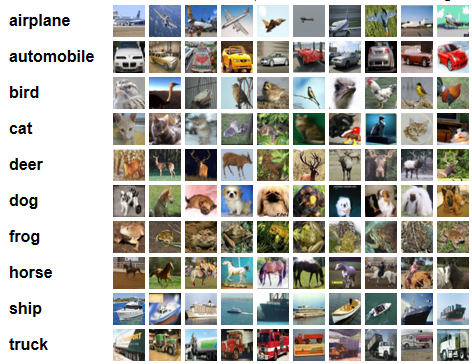
        
        
         
    

<b> <font face='verdana' size='5' color='navy'>2. DATA EXPLORATION & PREPROCESSING</font>
## __2.1 Import Modules__

In [ ]:
import h5py
import keras
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Using TensorFlow backend.


## __2.2 Load and Explore Data__
<b> <p align='justify'> <font size='3'> There are indeed 50000 images in the training dataset and 10000 images in the test dataset and the images are square with colour (ie. 3 channels) and 32x32 pixels. </p>

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


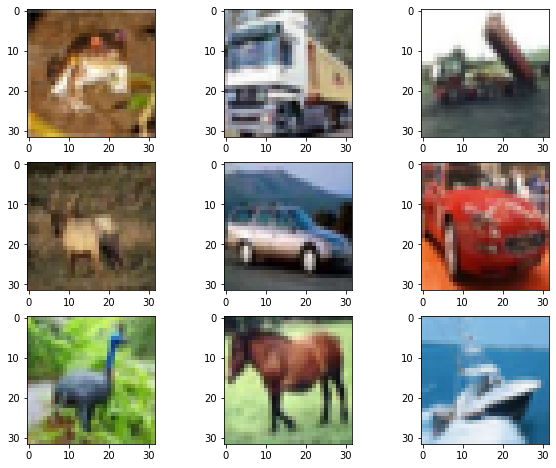

In [ ]:
from keras.datasets import cifar10
# Load the dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()
# Summarize the dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# Show the first 9 images
def plot_data(trainX):
    fig, ax = plt.subplots(3, 3, figsize=(10, 8))
    for idx, axes in enumerate(ax.flatten()):
        axes.imshow(trainX[idx])
    plt.show()
plot_data(trainX)

<b> <p align='justify'> <font size='3'> The values below correspond to the class labels for the above 9 images in the training dataset with the first image being '6' for frog, second and third images being '9' for truck as well as the forth image being '4' for deer and so on. </p>

In [ ]:
print(trainy[:9])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]]


<b> <p align='justify'> <font size='3'> The class labels and their standard associated integer values are listed as follow: 
- 0: airplane , 1: automobile , 2: bird , 3: cat , 4: deer , 5: dog , 6: frog, 7: horse , 8: ship , 9: truck</p> 

In [ ]:
print(np.unique(trainy))

[0 1 2 3 4 5 6 7 8 9]


<b> <p align='justify'> <font size='3'> On the other hand, the images in the training dataset are represented by pixel values which are integers in the range between 0 to 255 (inclusive), ie. between no colour and full colour.</p> 

In [ ]:
print(trainX[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


## __2.3 Preprocess Data__

#### __One Hot Encode Class Label Values__

In [ ]:
from keras.utils import to_categorical
n_classes = 10
trainy = to_categorical(trainy, n_classes)
testy = to_categorical(testy, n_classes)

# Print the first one-hot-encoded label
print(trainy[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


#### __Normalize Pixel Values of Images__

In [ ]:
# Convert integers to floating point numbers
# Rescale the 3 channels RGB data with pixel levels from range [0,250] to range [0,1]
trainX = trainX.astype('float32') / 255
testX = testX.astype('float32') / 255

# Print the training data which has been rescaled to range [0,1]
print(trainX[0])

[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


<br>

<b> <font face='verdana' size='5' color='navy'>3. CLASSIFICATION MODEL</font>

## __3.1 Build Baseline Model__

#### __Define Hyperparameters__

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Set the hyperparameters
FILTER = 16
KERNEL_SIZE = 5
POOL_SIZE = 2
DENSE = 256
EPOCHS = 10
BATCH_SIZE = 64

#### __Create 3-Block VGG Style Model__
<b> <p align='justify'> <font size='2'> The baseline 3-Block VGG style Model consists of 3 blocks of 2 Convolution layers followed by a Maxpooling layer. The activation function used in each Convolution layer is 'relu' to introduce non-linearity and avoid the Vanishing Gradient problem. Then the next layer is flattened to connect to the first Dense layer. The last Dense Layer is the output layer which has 10 nodes as there are the 10 class labels ie. one node for each possible outcome. The activation function for this last layer is Softmax to output the probability distribution over each possible class label and then used to classify the image according to the most probable class. </p>

In [ ]:
model = Sequential()
model.add(Conv2D(filters=FILTER, kernel_size=KERNEL_SIZE, padding='same', activation='relu', input_shape=trainX.shape[1:]))
model.add(Conv2D(filters=FILTER, kernel_size=KERNEL_SIZE, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=POOL_SIZE))
model.add(Conv2D(filters=FILTER * 2, kernel_size=KERNEL_SIZE, padding='same', activation='relu'))
model.add(Conv2D(filters=FILTER * 2, kernel_size=KERNEL_SIZE, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=POOL_SIZE))
model.add(Conv2D(filters=FILTER * 4, kernel_size=KERNEL_SIZE, padding='same', activation='relu'))
model.add(Conv2D(filters=FILTER * 4, kernel_size=KERNEL_SIZE, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=POOL_SIZE))
model.add(Flatten())
model.add(Dense(DENSE, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))
model.summary()





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        1216      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 16)        6416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        12832     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 64)          51264     
______

#### __Compile and Train Model__
<b> <p align='justify'> <font size='2'> The chosen optimizer is Adam which can achieve good results fast and the loss function used is Categorical Cross-Entropy for multi-class classification problem. The dataset is partitioned into training set of 80% images to train the model and 20% images to validate the classifier. Checkpointing is setup to save the model weights to the same hdf5 file when the validation accuracy improves during training ie. model weights are written to the hdf5 file only if the classification accuracy of the model on the validation dataset improves over the best seen so far. </p>

In [ ]:
from keras import callbacks
from keras.callbacks import ModelCheckpoint

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Use ModelCheckpoint to save the model with the best parameters
checkpointer = ModelCheckpoint(filepath='model_{}_{}_{}_{}_{}_{}.hdf5'.format(FILTER,KERNEL_SIZE,POOL_SIZE,DENSE,EPOCHS,BATCH_SIZE), verbose=1, save_best_only=True)

# Train the model using 80% training data and 20% validation data
hist = model.fit(trainX, trainy, validation_split=0.2, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[checkpointer])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 83s 2ms/step - loss: 1.7068 - acc: 0.3594 - val_loss: 1.4464 - val_acc: 0.4730

Epoch 00001: val_loss improved from inf to 1.44638, saving model to model_16_5_2_256_10_64.hdf5
Epoch 2/10
40000/40000 [==============================] - 81s 2ms/step - loss: 1.2958 - acc: 0.5292 - val_loss: 1.2017 - val_acc: 0.5711

Epoch 00002: val_loss improved from 1.44638 to 1.20174, saving model to model_16_5_2_256_10_64.hdf5
Epoch 3/10
40000/40000 [==============================] - 85s 2ms/step - loss: 1.0798 - acc: 0.6169 - val_loss: 1.0381 - val_acc: 0.6374

Epoch 00003: val_loss improved from 1.20174 to 1.03809, saving model to model_16_5_2_256_10_64.hdf5
Epoch 4/10
40000/40000 [==============================] - 90s 2ms/step - loss: 0.9264 - acc: 0.6708 - val_loss: 0.9380 - val_acc: 0.6708

Epoch

#### __Plot Accuracy and Loss Scores__
<b> <p align='justify'> <font size='2'> The graphs of Training accuracy vs Validation accuracy and Training loss vs Validation loss indicates that the model is overfitting.</p>

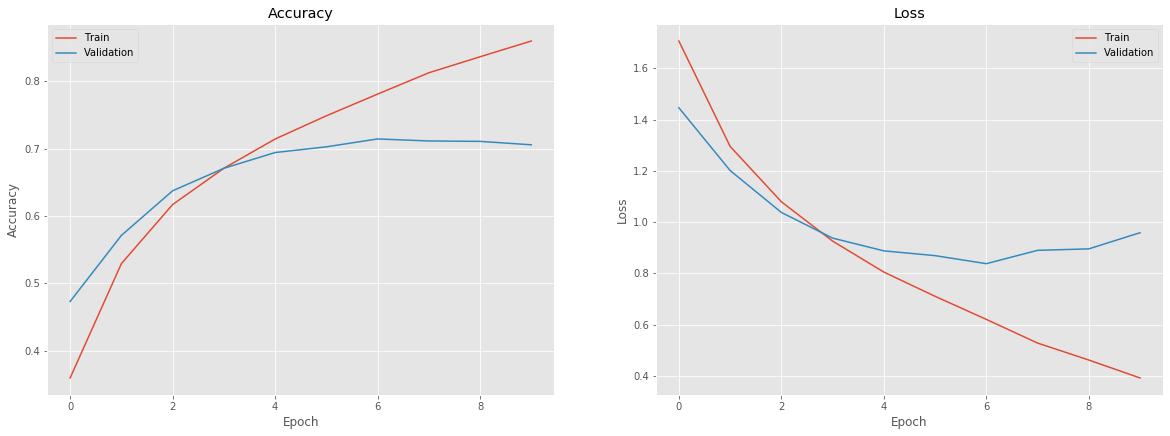

In [ ]:
# Change matplotlib graph style
matplotlib.style.use('ggplot')

# Visualize the model's Train vs Validation accuracy
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')

plt.subplot(2,2,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper right')

plt.show()

## __3.2 Evaluate Model against Test Dataset__

#### __Compute Test Accuracy and Test Loss Scores__

In [ ]:
score = model.evaluate(testX, testy, verbose=0)
print('Test Accuracy: %.2f%%   Test Loss: %.3f' % (score[1]*100, score[0]))

Test Accuracy: 70.17%   Test Loss: 1.001


<br>

<b> <font face='verdana' size='5' color='navy'>4. METHODS & IMPROVEMENTS</font>

## __4.1 Dropout Regularization__
<b> <p align='justify'> <font size='3'> Dropout is one of the techniques for addressing overfitting problems. The key idea is to randomly drop units (along with their connections) from the neural network during training. The reduction in number of parameters in each step of training has the effect of regularization. </p>

#### __Modify 3-Block VGG Style Model__

In [ ]:
from keras.layers import Dropout

model = Sequential()
model.add(Conv2D(filters=FILTER, kernel_size=KERNEL_SIZE, padding='same', activation='relu', input_shape=trainX.shape[1:]))
model.add(Conv2D(filters=FILTER, kernel_size=KERNEL_SIZE, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=POOL_SIZE))
model.add(Dropout(0.25))
model.add(Conv2D(filters=FILTER * 2, kernel_size=KERNEL_SIZE, padding='same', activation='relu'))
model.add(Conv2D(filters=FILTER * 2, kernel_size=KERNEL_SIZE, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=POOL_SIZE))
model.add(Dropout(0.25))
model.add(Conv2D(filters=FILTER * 4, kernel_size=KERNEL_SIZE, padding='same', activation='relu'))
model.add(Conv2D(filters=FILTER * 4, kernel_size=KERNEL_SIZE, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=POOL_SIZE))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(DENSE, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 32, 32, 16)        1216      
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 32, 32, 16)        6416      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 16, 16, 32)        12832     
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 16, 16, 32)        25632     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 32)          0         
__________

#### __Compile and Train Modified Model__

In [ ]:
from keras import callbacks
from keras.callbacks import ModelCheckpoint

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Use ModelCheckpoint to save the model with the best parameters
checkpointer = ModelCheckpoint(filepath='model_{}_{}_{}_{}_{}_{}.hdf5'.format(FILTER,KERNEL_SIZE,POOL_SIZE,DENSE,EPOCHS,BATCH_SIZE), verbose=1, save_best_only=True)

# Train the model using 80% training data and 20% validation data
hist = model.fit(trainX, trainy, validation_split=0.2, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[checkpointer])

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 95s 2ms/step - loss: 1.7786 - acc: 0.3309 - val_loss: 1.4784 - val_acc: 0.4470

Epoch 00001: val_loss improved from inf to 1.47842, saving model to model_16_5_2_256_10_64.hdf5
Epoch 2/10
40000/40000 [==============================] - 92s 2ms/step - loss: 1.4514 - acc: 0.4618 - val_loss: 1.2890 - val_acc: 0.5407

Epoch 00002: val_loss improved from 1.47842 to 1.28895, saving model to model_16_5_2_256_10_64.hdf5
Epoch 3/10
40000/40000 [==============================] - 112s 3ms/step - loss: 1.2817 - acc: 0.5338 - val_loss: 1.1932 - val_acc: 0.5667

Epoch 00003: val_loss improved from 1.28895 to 1.19323, saving model to model_16_5_2_256_10_64.hdf5
Epoch 4/10
40000/40000 [==============================] - 105s 3ms/step - loss: 1.1581 - acc: 0.5848 - val_loss: 1.1405 - val_acc: 0.5889

Epoch 00004: val_loss improved from 1.19323 to 1.14055, saving model to model_16_5_2_256_10_64.hdf5


#### __Plot Accuracy and Loss Scores__
<b> <p align='justify'> <font size='2'> After applying the Dropout technique, the graphs of Training accuracy vs Validation accuracy and Training loss vs Validation loss indicates a marked improvement in resolving the model's overfitting problem.</p>

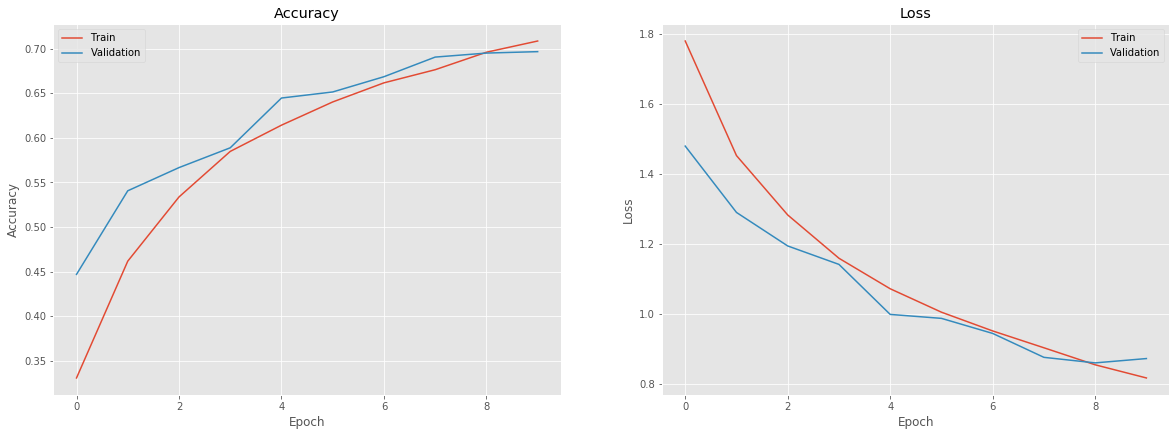

In [ ]:
# Change matplotlib graph style
matplotlib.style.use('ggplot')

# Visualize the model's Train vs Validation accuracy
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')

plt.subplot(2,2,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper right')

plt.show()

#### __Compute Test Accuracy and Test Loss Scores__
<b> <p align='justify'> <font size='2'> The Test accuracy and Test loss scores did not change significantly after applying Dropout technique.

In [ ]:
score = model.evaluate(testX, testy, verbose=0)
print('Test Accuracy: %.2f%%   Test Loss: %.3f' % (score[1]*100, score[0]))

Test Accuracy: 69.15%   Test Loss: 0.889


## __4.2 Hyperparameter Tuning__

#### __Modify Hyperparameters__
<b> <p align='justify'> <font size='2'> This technique can help to tune or improve the classifier's performance. In the below example, the hyperparameter 'epochs' has been increased to allow the model to train longer in a bid to improve the Test accuracy and Test loss scores. This is because the previous set of graphs seem to indicate that the model's performance in test accuracy and loss scores can be achieved if the model is trained with more epochs. </p>

In [ ]:
# Set the hyperparameters
FILTER = 16
KERNEL_SIZE = 5
POOL_SIZE = 2
DENSE = 256
EPOCHS = 30         # Increase the number of epochs from 10 to 30
BATCH_SIZE = 64

#### __Train Same Model with Modified Hyperparameters__

In [ ]:
from keras import callbacks
from keras.callbacks import ModelCheckpoint

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Use ModelCheckpoint to save the model with the best parameters
checkpointer = ModelCheckpoint(filepath='model_{}_{}_{}_{}_{}_{}.hdf5'.format(FILTER,KERNEL_SIZE,POOL_SIZE,DENSE,EPOCHS,BATCH_SIZE), verbose=1, save_best_only=True)

# Train the model using 80% training data and 20% validation data
hist = model.fit(trainX, trainy, validation_split=0.2, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[checkpointer])

Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 98s 2ms/step - loss: 1.7638 - acc: 0.3357 - val_loss: 1.5940 - val_acc: 0.4252

Epoch 00001: val_loss improved from inf to 1.59400, saving model to model_16_5_2_256_30_64.hdf5
Epoch 2/30
40000/40000 [==============================] - 97s 2ms/step - loss: 1.3941 - acc: 0.4912 - val_loss: 1.2323 - val_acc: 0.5552

Epoch 00002: val_loss improved from 1.59400 to 1.23230, saving model to model_16_5_2_256_30_64.hdf5
Epoch 3/30
40000/40000 [==============================] - 99s 2ms/step - loss: 1.2171 - acc: 0.5628 - val_loss: 1.0592 - val_acc: 0.6202

Epoch 00003: val_loss improved from 1.23230 to 1.05919, saving model to model_16_5_2_256_30_64.hdf5
Epoch 4/30
40000/40000 [==============================] - 128s 3ms/step - loss: 1.0908 - acc: 0.6098 - val_loss: 0.9956 - val_acc: 0.6512

Epoch 00004: val_loss improved from 1.05919 to 0.99561, saving model to model_16_5_2_256_30_64.hdf5
E

#### __Plot Accuracy and Loss Scores__
<b> <p align='justify'> <font size='2'> After Hyperparameter Tuning with increased number of epochs, the graphs of Training accuracy vs Validation accuracy and Training loss vs Validation loss indicate an improvement in the model's validation accuracy and loss scores when trained with higher number of epochs.</p>

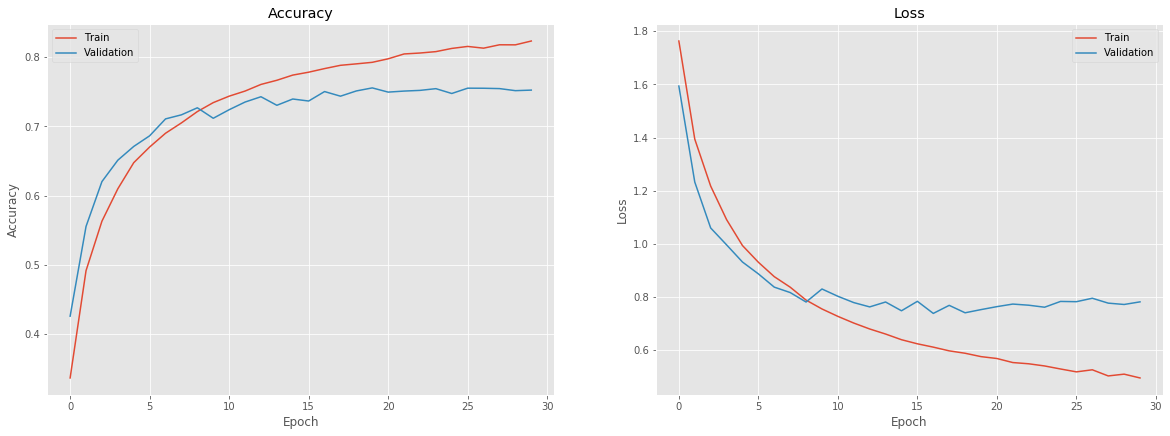

In [ ]:
# Change matplotlib graph style
matplotlib.style.use('ggplot')

# Visualize the model's Train vs Validation accuracy
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')

plt.subplot(2,2,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper right')

plt.show()

#### __Compute Test Accuracy and Test Loss Scores__
<b> <p align='justify'> <font size='2'> The Test accuracy and Test loss scores improved significantly after applying Hyperparameter tuning in the form of increased number of epochs.</p>

In [ ]:
score = model.evaluate(testX, testy, verbose=0)
print('Test Accuracy: %.2f%%   Test Loss: %.3f' % (score[1]*100, score[0]))

Test Accuracy: 74.97%   Test Loss: 0.802


<br>

<b> <font face='verdana' size='5' color='navy'>5. RESULTS & ANALYSIS</font>

## __5.1 Classification Report__
<b> <p align='justify'> <font size='3'> The Precision, Recall and F1 scores based on the prediction results for the test dataset. Based on the scores, 'cat' is the worst performing class followed by 'dog' while 'automobile' and 'ship' are the best performing classes. </p>

In [ ]:
from sklearn.metrics import classification_report
predictions = model.predict(testX)
print(classification_report(testy.argmax(axis=1),
    predictions.argmax(axis=1), target_names=labels))

              precision    recall  f1-score   support

    airplane       0.80      0.77      0.79      1000
  automobile       0.90      0.84      0.87      1000
        bird       0.70      0.60      0.65      1000
         cat       0.54      0.59      0.56      1000
        deer       0.72      0.73      0.72      1000
         dog       0.68      0.59      0.64      1000
        frog       0.74      0.85      0.79      1000
       horse       0.86      0.75      0.80      1000
        ship       0.80      0.88      0.84      1000
       truck       0.78      0.89      0.83      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



##### __Definitions:__
- Precision: Number of items correctly identified as positive out of total items identified as positives.
- Recall: Number of items correctly identified as positive out of total true positives.
- F1 Score: A balanced measure which is a function of both Precision and Recall. 

## __5.2 Prediction Results__

### __Predictions for Images from Test Dataset__
<b> <p align='justify'> <font size='3'> Compute the corresponding predicted probability of each class for 9 images. </p>

In [ ]:
print(model.predict_proba(testX)[0:9, :])

[[2.94677084e-05 1.44922024e-05 9.25534405e-05 5.97461760e-01
  1.93021697e-05 4.02203560e-01 1.24288461e-04 3.19914398e-05
  1.57186732e-05 6.89869057e-06]
 [1.26644503e-04 7.43459212e-04 1.69896163e-11 1.02255510e-10
  5.92684929e-11 3.15033535e-13 9.14046505e-10 1.80435148e-12
  9.99116600e-01 1.33092217e-05]
 [1.16920345e-01 2.22733361e-03 1.28281143e-04 1.04484905e-03
  4.15154325e-04 3.29962932e-05 6.70219713e-04 3.62376275e-04
  8.58771861e-01 1.94265097e-02]
 [8.53918910e-01 1.28374154e-07 5.88872208e-05 1.18591578e-03
  2.59103673e-03 3.83802700e-07 9.98672022e-07 6.58380372e-08
  1.42242000e-01 1.70032217e-06]
 [5.59553293e-08 7.29433566e-07 7.75157800e-03 3.61366454e-03
  5.54148853e-03 1.65482306e-05 9.83075202e-01 5.08321065e-08
  7.16323143e-07 2.42330600e-08]
 [6.01122451e-07 2.26947705e-05 9.81775462e-04 1.89764258e-02
  1.46049180e-03 8.14085454e-02 8.96978736e-01 7.97294924e-05
  3.21521184e-05 5.88381408e-05]
 [1.95032533e-03 4.12617207e-01 1.40736456e-05 5.14260959e

<b> <p align='justify'> <font size='3'> Class Labels with Highest Probabilities for the 9 Images. </p>

In [ ]:
labels =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
 
indices = np.argmax(model.predict(testX[:9]),1)
print([labels[x] for x in indices])

['cat', 'ship', 'ship', 'airplane', 'frog', 'frog', 'truck', 'frog', 'cat']


<b> <p align='justify'> <font size='3'> The above predicted class labels appear quite accurate based on the 9 images shown except for the seventh image which seems to be an automobile but is misclassified as a truck. Thus, only one out of nine images has been misclassified in this case. However, the misclassified instance is associated to the classes 'automobile' and 'truck' which are both motor vehicles and are closely related in nature. </p>

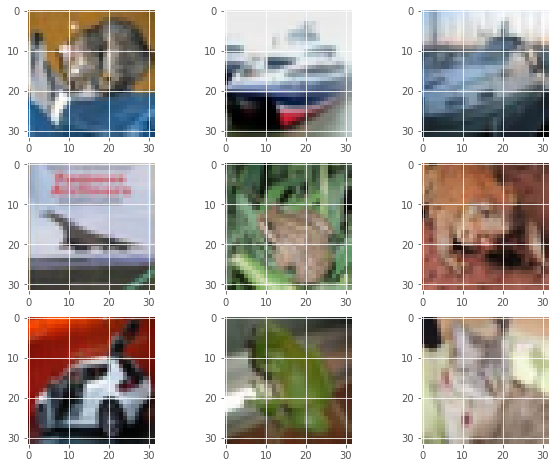

In [ ]:
plot_data(testX[:9])

### __Predictions for My Dog's Image File__
<b> <p align='justify'> <font size='3'> Import my dog's image file. </p>

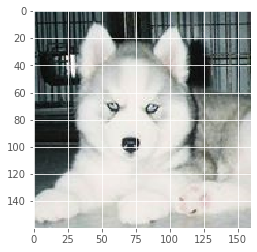

In [ ]:
my_img = plt.imread('FBdog.png')
img = plt.imshow(my_img)

<b> <p align='justify'> <font size='3'> Resize my dog's image from 160x160 pixels to a 32x32 pixels with 3 channels (the same input shape used in the model). </p>

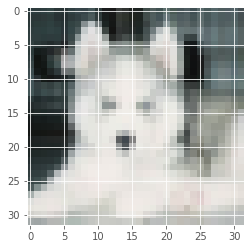

In [ ]:
import skimage
from skimage.transform import resize
my_img_resized = resize(my_img, (32,32,3))
img = plt.imshow(my_img_resized)

<b> <p align='justify'> <font size='3'> Compute the image's corresponding predicted probability for each class. </p>

In [ ]:
pred_prob_img = model.predict(np.array([my_img_resized,]))
print(pred_prob_img)

[[2.8173379e-09 1.1356027e-10 7.3964497e-06 6.0453945e-01 1.3142286e-05
  3.9498651e-01 6.4245876e-05 3.8912636e-04 2.9505422e-08 7.1355335e-09]]


<b> <p align='justify'> <font size='3'> Present the image's top 3 predicted probabilities with class labels. </p>
<b> <p align='justify'> <font size='2'> Unfortunately, the model would have misclassified my dog as a cat as it computed the highest probability of 0.60 for 'cat' while the 'dog' class achieved the second highest probability of 0.39 and the third highest probability being the 'horse' class at a very low value of less than 0.01.</p>

In [ ]:
index = np.argsort(pred_prob_img[0,:])
print('Most likely class with probability of', pred_prob_img[0, index[9]], ':', labels[index[9]])
print('Second most likely class with probability of', pred_prob_img[0, index[8]], ':', labels[index[8]])
print('Third most likely class with probability of', pred_prob_img[0, index[7]], ':', labels[index[7]])

Most likely class with probability of 0.60453945 : cat
Second most likely class with probability of 0.3949865 : dog
Third most likely class with probability of 0.00038912636 : horse


<br>

<b> <font face='verdana' size='5' color='navy'>6. CONCLUSION</font>
<b> <p align='justify'> <font size='3'> In summary, the initial baseline model performed reasonably well with test accuracy of 70% and test loss of around 1.00 when trained with 10 epochs. However, this model appears to be overfitting so to improve its performance, the Dropout technique is utilized. The new model with Dropout then attained test scores of 69% for accuracy and 0.89 for loss after training for 10 epochs as well. Next, hyperparameter tuning in the form of increasing the number of epochs to train from 10 to 30 yielded significant improvements to the test scores at 75% for accuracy and 0.80 for loss. However, it is observed that a couple of pairs of classes of images which are closely related in nature may result in images being misclassfied. For instance, the automobile image was misclassified as a truck and my dog's image was misclassified as a cat. </p>
<b> <p align='justify'> <font size='3'> To improve the model's performance, other techniques can be explored. A technique like Data Augmentation can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset so as to improve the performance and ability of the model to generalize. Further Hyperparameter Tuning can also be employed, using varying learning rates, batch sizes, kernel sizes and number of filters etc. In addition, the model may also benefit from using Batch Normalization to optimize the training, allow higher learning rates, make the network train faster and the weights easier to initialize. Another method is to utilize Transfer Learning in the model ie. to employ a pre-trained model which was used to solve a different problem in the current model. This last method is especially good at building accurate models in a time-saving way. </p> 
<b> <p align='justify'> <font size='3'>   </p>

<br>

<b> <font face='verdana' size='5' color='navy'>7. REFERENCES</font>
### __About CIFAR-10 Dataset:__
<b> <p align='justify'> <font size='3'> CIFAR is an acronym that stands for the Canadian Institute For Advanced Research and the CIFAR-10 dataset was developed by researchers at the CIFAR institute. This report 'Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009' (Chapter 3) describes the dataset and the methodology followed when collecting it in much greater detail. The hyperlink to the report: </p>    
##### *http://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf* 